[2.94238e+00 6.95200e-02 1.96608e+05 7.68000e+02 1.97376e+05 2.21184e+05
 3.20000e+01]
[4.24320e-01 6.84100e-02 1.96608e+05 3.07200e+03 1.99680e+05 2.45760e+05
 1.60000e+01]
[3.61300e-02 6.66100e-02 1.96608e+05 1.22880e+04 2.08896e+05 2.94912e+05
 8.00000e+00]
[1.80700e-02 5.46300e-02 1.96608e+05 4.91520e+04 2.45760e+05 3.93216e+05
 4.00000e+00]
[1.07400e-02 3.66300e-02 1.96608e+05 1.96608e+05 3.93216e+05 5.89824e+05
 2.00000e+00]
[0 1 2 3 4 5 6]
[array([[1.        , 1.        , 1.        , 0.00390625, 0.50195312,
        0.375     , 1.        ],
       [0.14420979, 0.98403337, 1.        , 0.015625  , 0.5078125 ,
        0.41666667, 0.5       ],
       [0.01227918, 0.95814154, 1.        , 0.0625    , 0.53125   ,
        0.5       , 0.25      ],
       [0.00614129, 0.78581703, 1.        , 0.25      , 0.625     ,
        0.66666667, 0.125     ],
       [0.00365011, 0.52689873, 1.        , 1.        , 1.        ,
        1.        , 0.0625    ]])]


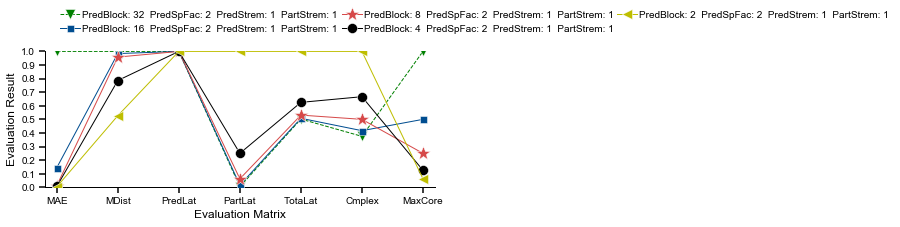

In [47]:
# FPS_Performance_Eval

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../Nebula/scripts/')
sys.path.append('../source/')
from cls_plt_fig import cls_plt_fig

# np.save(file="perf.npy", arr=np.ones([2, 2, 2, 2, 7]))

fig_name ='../generate/FPS_Performance_Eval.svg'
perf = np.load(file='../source/eval.npy')

#pick    = [[16, 8, 1, 8], [16, 8, 4, 8], [16, 8, 5, 8], [16, 8, 6, 8], [16, 8, 8, 8], [16, 8, 12, 8], [16, 8, 16, 8]] # -> PredStrem = 4

#pick    = [[16, 8, 4, 1], [16, 8, 4, 4], [16, 8, 4, 8], [16, 8, 4, 12], [16, 8, 4, 16]]
#pick    = [[32, 16, 4, 1], [16, 16, 4, 2], [8, 16, 4, 4], [4, 16, 4, 8], [2, 16, 4, 16]]  # -> Block*Part = 32，Block does not affect total latency
#pick    = [[16, 16, 4, 1], [8, 16, 4, 2], [4, 16, 4, 4], [2, 16, 4, 8]]  # -> Block unimportant becuase of PartStem, recommand 8; Complexible Block size and thus Compatible to FM extraction
#pick    = [[8, 16, 4, 2], [4, 16, 4, 4], [2, 16, 4, 8]] 
#pick    = [[16, 2, 4, 2], [16, 4, 4, 2], [16, 8, 4, 2], [16, 16, 4, 2], [16, 32, 4, 2]]
#pick    = [[8, 16, 4, 4], [4, 16, 4, 4], [2, 16, 4, 4], [1, 16, 4, 4]]  
#pick    = [[16, 8, 4, 2], [16, 12, 4, 2], [16, 16, 4, 2], [16, 32, 4, 2]] # -> SpFactor = 16？
pick    = [[32, 2, 1, 1], [16, 2, 1, 1], [8, 2, 1, 1], [4, 2, 1, 1], [2, 2, 1, 1]] 
legend  = []
y_value = []
item_dim    = []
scale   = []
item_x  = []
for j in range(7):
    for i in range(len(pick)):
        item = perf[pick[i][0]][pick[i][1]][pick[i][2]][pick[i][3]]
        item_dim.append([item[j]])
    scale.append(np.max(np.array(item_dim)))
    item_dim = []

for i in range(len(pick)):
    item = perf[pick[i][0]][pick[i][1]][pick[i][2]][pick[i][3]]
    print(item)
    for j in range(7):
        item_x.append(item[j]/scale[j])
    y_value.append(item_x)
    item_x = []
    legend_item = 'PredBlock: ' + str(pick[i][0]) + '  '\
                  'PredSpFac: ' + str(pick[i][1]) + '  '\
                  'PredStrem: ' + str(pick[i][2]) + '  '\
                  'PartStrem: ' + str(pick[i][3])
                    # 'PredNumBlock: '
                    # 'PredSpFactor: '
                    # 'PredNumStrem: '
                    # 'PartNumStrem: '
    legend.append(legend_item)

y_value = np.array(y_value)
x_value = np.arange(7)

figsize=(7,2.5)

bar_width = 0.25
xticks = ['MAE', 'MDist', 'PredLat', 'PartLat', 'TotaLat', 'Cmplex', 'MaxCore']
legend_loc = (0.03, 1.1)

y_value = [y_value]
y_label = ["Evaluation Result"]
y_fig_type = [['plot' for i in range(len(legend))]]
y_legend = [legend]
legend_ncol = 3 # (0/255, 77/255, 144/255),(1,1,1)], [(220/255, 103/255, 103/255)
y_color=[[(0, 128/256, 0),(0/255, 77/255, 144/255), (214/255, 73/255, 73/255), (0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256),
          (1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256)]]
len_yticks = [10, 10]
y_yticks_max = [1, 100]
print(x_value)
print(y_value)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    x_label = "Evaluation Matrix",
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0, 0, 0), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255)],[]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle = [['dashed','solid','solid','solid','solid','solid','solid',
                    'dashed','dashed','dashed','dashed','dashed','dashed','dashed']],
    y_marker = [['v', 's', '*', 'o', '<', '.', 'v', 's', '*', 'o', '<', '.']],
    y_markersize=[[10, 7, 15, 10, 10, 10, 10]],
    y_markeredgewidth=0.5,
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    bar_width = bar_width,
    linewidth= 1,
    bar_gap_width = 0.1,
    border_width = 0.2
)

[0 1 2 3 4]
[[array([0.54545455, 0.87878788, 0.90909091, 1.        , 0.90909091]), array([0.90410959, 0.98630137, 0.98630137, 0.98630137, 1.        ]), array([1.        , 0.26153901, 0.13846264, 0.07692308, 0.0461533 ])]]


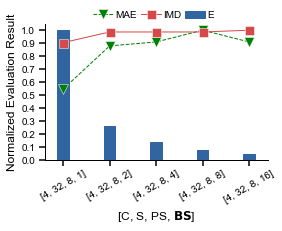

In [13]:
# Different Configuration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../Nebula/scripts/')
sys.path.append('../source/')
from cls_plt_fig import cls_plt_fig

# Figure = "C"
# Figure = "S"
Figure = "PS"
# Figure = "BS"
if Figure == "C":
    fig_name='../generate/Different_Configuration_Cubes.svg'
    x_label     = "[" + r"$\bf{C}$" + ", S, PS, BS]"
    xticks  = ['[2, 32, 8, 16]', '[4, 32, 8, 16]', '[8, 32, 8, 16]', '[16, 32, 8, 16]', '[32, 32, 8, 16]']
    item    = np.array([
[
0.015, 
0.030, 
0.068, 
0.741, 
4.173
], [
0.066, 
0.073, 
0.085, 
0.094, 
0.104, 
], [
28032, 
16819, 
11213, 
8410, 
7008 
]])
elif Figure == "S":
    fig_name='../generate/Different_Configuration_Sparse_Coefficient.svg'
    x_label     = "[C, " + r"$\bf{S}$" + ", PS, BS]"
    xticks  = ['[4, 2, 8, 16]', '[4, 4, 8, 16]', '[4, 8, 8, 16]', '[4, 16, 8, 16]', '[4, 32, 8, 16]']
    item    = np.array([
[
0.031 ,
0.030 ,
0.033 ,
0.035 ,
0.030 
],
[
0.045 ,
0.046 ,
0.048 ,
0.057 ,
0.073 
],
[
1446451, 
370022 ,
100915 ,
33638 ,
16819 
]])
elif Figure == "PS":
    fig_name='../generate/Different_Configuration_Prediction_Streams.svg'
    x_label     = "[C, S, " + r"$\bf{PS}$" + ", BS]"
    xticks  = ['[4, 32, 1, 16]', '[4, 32, 2, 16]', '[4, 32, 4, 16]', '[4, 32, 8, 16]', '[4, 32, 16, 16]']
    item    = np.array([
[
0.038, 
0.030, 
0.028, 
0.030, 
0.037 
],
[
0.170, 
0.128, 
0.089, 
0.073, 
0.056 
],
[
16819, 
16819, 
16819, 
16819, 
22426 
]])
elif Figure == "BS":
    fig_name='../generate/Different_Configuration_Block_Streams.svg'
    x_label     = "[C, S, PS, " + r"$\bf{BS}$" + "]"
    xticks  = ['[4, 32, 8, 1]', '[4, 32, 8, 2]', '[4, 32, 8, 4]', '[4, 32, 8, 8]', '[4, 32, 8, 16]']
    item    = np.array([
[
0.018, 
0.029, 
0.030, 
0.033, 
0.030 
],
[
0.066, 
0.072, 
0.072, 
0.072, 
0.073 
],
[
364416, 
95309 ,
50458 ,
28032 ,
16819 
]])

x_value     = np.arange(5)
figsize     = (4,2.5)
bar_width   = 0.25
legend_loc  = (0.2, 1)

y_value     = [[item[0]/np.max(item[0]), item[1]/np.max(item[1]), item[2]/np.max(item[2])]]
y_label     = ["Normalized Evaluation Result"]
y_fig_type  = [['plot', 'plot', 'bar']]
y_legend    = [["MAE", "IMD", "E"]]
legend_ncol = 3 # (0/255, 77/255, 144/255),(1,1,1)], [(220/255, 103/255, 103/255)
y_color     =[[(0, 128/256, 0),(214/255, 73/255, 73/255), (49/255, 101/255, 162/255), (0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256),
          (1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256)]]
len_yticks  = [10, 10]
y_yticks_max= [1, 100]
print(x_value)
print(y_value)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    x_label = x_label,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0, 0, 0), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255), (49/255, 101/255, 162/255)],[]],
    # y_hatch = [['/////', '/////', '/////'],[None, None]],
    y_linestyle = [['dashed','solid','solid','solid','solid','solid','solid',
                    'dashed','dashed','dashed','dashed','dashed','dashed','dashed']],
    y_marker = [['v', 's', '*', 'o', '<', '.', 'v', 's', '*', 'o', '<', '.']],
    y_markersize=[[10, 9, 15, 10, 10, 10, 10]],
    y_markeredgewidth=0.5,
    ylim_upappend = [0.05, 0.05],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    bar_width = bar_width,
    linewidth= 1,
    bar_gap_width = 0.1,
    border_width = 0.4,
    labelrotation = 30
)